In [1]:
import pandas as pd
from sqlalchemy import create_engine, inspect
import matplotlib.pyplot as plt
import seaborn as sns

from config import DB_USER, DB_NAME, DB_PW, DB_SCHEMA

In [2]:
# Connection details
db_user = DB_USER
db_password = DB_PW
db_host = "localhost"   # or IP address if remote
db_port = "5432"        # default PostgreSQL port
db_name = DB_NAME
db_schema = DB_SCHEMA

# Create SQLAlchemy engine
engine = create_engine(
    f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}",
    connect_args={'options': f'-csearch_path={db_schema}'}
)

inspector = inspect(engine)


In [3]:
# VERIFY TABLES
table_names = inspector.get_table_names()
print(table_names)

['atl_food_place', 'menu_items']


In [5]:
# PLACE DATA IN PANDAS DFS
atl_food_palce_df = pd.read_sql("SELECT * FROM atl_food_place", engine)
menu_items_df = pd.read_sql("SELECT * FROM menu_items", engine)
avg_nutr_df = pd.read_sql("SELECT * FROM gusto_avg_nutrition", engine)

In [ ]:
# PREVIEW places
atl_food_palce_df.head()

In [ ]:
# PREVIEW menu_items
menu_items_df.head()

In [14]:
# PREVIEW nutritional score view
avg_nutr_df_sorted = avg_nutr_df.sort_values("avg_nutrition_score", ascending=True)  # ascending=True because hbar inverts Y
avg_nutr_df_sorted

,protein_type,avg_nutrition_score
4,Avocado,1.78
3,Tofu,1.94
2,Grilled Chicken,2.27
1,Spicy Chicken,2.28
0,Shrimp,2.35


In [15]:
# define colors

# Map protein types to custom colors
protein_colors = {
    "Grilled Chicken": "saddlebrown",
    "Spicy Chicken": "red",
    "Shrimp": "orange",
    "Tofu": "black",
    "Avocado": "green",
    "Other": "gray"
}

# Match colors to df order
colors = avg_nutr_df_sorted["protein_type"].map(protein_colors)
colors

4          green
3          black
2    saddlebrown
1            red
0         orange
Name: protein_type, dtype: object

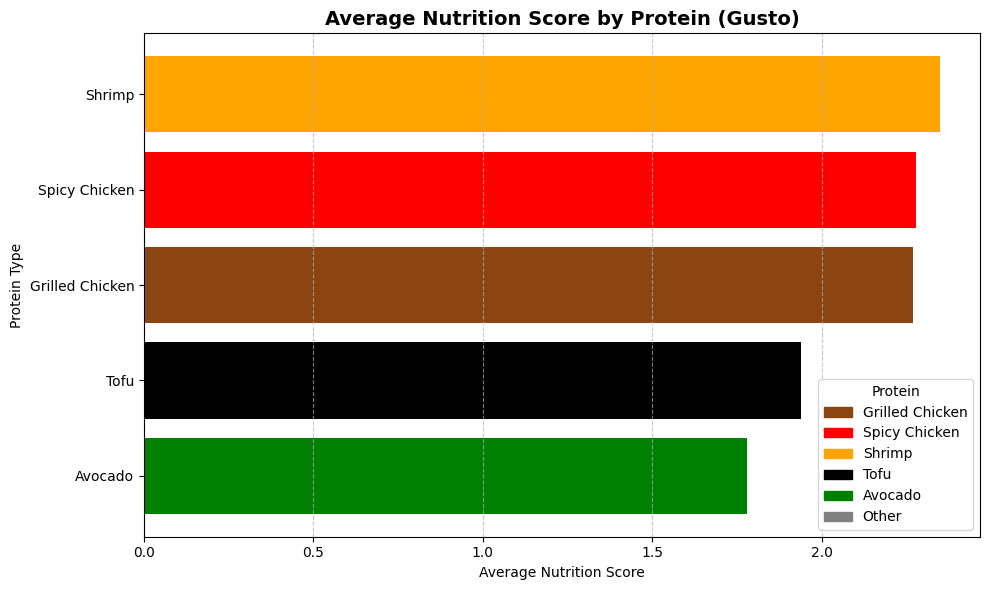

In [16]:
# create horizontal bar chart
plt.figure(figsize=(10,6))

bars = plt.barh(avg_nutr_df_sorted["protein_type"], avg_nutr_df_sorted["avg_nutrition_score"], color=colors)

# Gridlines
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Labels and Title
plt.xlabel("Average Nutrition Score")
plt.ylabel("Protein Type")
plt.title("Average Nutrition Score by Protein (Gusto)", fontsize=14, weight="bold")

# Add legend manually (from protein_colors mapping)
handles = [plt.Rectangle((0,0),1,1, color=protein_colors[p]) for p in protein_colors.keys()]
plt.legend(handles, protein_colors.keys(), title="Protein")


# 🔹 Save as PNG
plt.tight_layout()  # avoid label cutoff
plt.savefig("avg_nutrition_by_protein.png", dpi=300, bbox_inches="tight")  # high-res PNG

plt.show()

